# This is Colab Notebook (ipynb) of  the **GDSC Machine Learning Hackathon** for **Team Lifergy**

## This Notebook include the Downtime Prediction Model capable of predicting downtime before it occurs. It uses the EAJ0001C  Hub Site Datasets

### Team Members include:
*   Aberejo Habeeblah O. (Team Lead)
*   Aina Ogechukwu (Query Analyst)
*   Raheem David
*   Micheal  Ezeane

# Data Loading

In [1]:
!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

# ARIMA functions and libraries imported here
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

!pip install scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# For prophet algorithms Model
!pip install pystan==2.19.1.1
!pip install fbprophet
!pip install prophet
from prophet import Prophet

# For Extreme Gradient Boost Model
!pip install xgboost
from xgboost import XGBRegressor

# for evaluation
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/studio-lab-user/.conda/envs/default/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-9ivfa968/fbprophet_5171fcc50de641dda999eda5629f61f5/setup.py'"'"'; __file__='"'"'/tmp/pip-install-9ivfa968/fbprophet_5171fcc50de641dda999eda5629f61f5/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-dj0_5pq_
       cwd: /tmp/pip-install-9ivfa968/fbprophet_5171fcc50de641dda999eda5629f61f5/
  Complete output (56 lines):
  /tmp/pip-install-9ivfa968/fbprophet_5171fcc50de641dda999eda5629f61f5/setup.py:10: DeprecationWarning: pkg_resources is d

Importing plotly failed. Interactive plots will not work.


In [2]:
# Specifying the hackathon dataset link
dataset_link_1 = 'https://drive.google.com/file/d/1HXVXS1ODeKxxTH-0N_uFYZhJ_dxgpcY9/view?usp=drive_link' # Raw Dataset as Provided for the hackathon
# For Reference, the file directory and name is GDSC ML HACK/EAJ0001C/0_EAJ0001C_log_20230828-1605_to_20231027-1605.csv

dataset_link_2 = 'https://drive.google.com/file/d/1Ekv0VZaqsVgxf5D3AdNtQHnnWS-Cje9c/view?usp=drive_link'

dataset_link_3 = 'https://drive.google.com/file/d/1goA3or-Cfk6zHF_ooqdSUObl9aUqTwu6/view?usp=drive_link'

dataset_link_4 = 'https://drive.google.com/file/d/12cVx7OV-jqvcYWlPMMZZoj5ND6erq2El/view?usp=drive_link'

# Extract the file ID from the link
file_id_1 = dataset_link_1.split("/")[-2]
file_id_2 = dataset_link_2.split("/")[-2]
file_id_3 = dataset_link_3.split("/")[-2]
file_id_4 = dataset_link_4.split("/")[-2]

# Construct the download link
download_link_1 = f"https://drive.google.com/uc?id={file_id_1}"
download_link_2 = f"https://drive.google.com/uc?id={file_id_2}"
download_link_3 = f"https://drive.google.com/uc?id={file_id_3}"
download_link_4 = f"https://drive.google.com/uc?id={file_id_4}"

# Read the dataset into a Pandas DataFrame
data_df1 = pd.read_csv(download_link_1, header = None, skiprows = [0,1,2])
data_df2 = pd.read_csv(download_link_2, header = None, skiprows = [0,1,2])
data_df3 = pd.read_csv(download_link_3, header = None, skiprows = [0,1,2])
data_df4 = pd.read_csv(download_link_4, header = None, skiprows = [0,1,2])

### Using none because the header isn't specific
### From my view opening the CSV, i noticed the datasets has 3 rows for used, i will then need to open with no header first
### Then i do some processing and thereafter make a column the headers after combining element from the 3 supposed head to one row

In [3]:
import pandas as pd
import os
from io import StringIO

# Install wget if not already installed
!pip install wget

# Function to download file from Google Drive
def download_from_drive(gdrive_id):
    # Construct the download link
    download_link = f"https://drive.google.com/uc?id={gdrive_id}"

    # Use wget to download the file and return content
    return os.popen(f"wget --quiet --no-check-certificate -O - '{download_link}'").read()

# Specifying the hackathon dataset link
dataset_links = [
    '1HXVXS1ODeKxxTH-0N_uFYZhJ_dxgpcY9',  # file ID for file 1
    '1Ekv0VZaqsVgxf5D3AdNtQHnnWS-Cje9c',  # file ID for file 2
    '1goA3or-Cfk6zHF_ooqdSUObl9aUqTwu6',  # file ID for file 3
    '12cVx7OV-jqvcYWlPMMZZoj5ND6erq2El'   # file ID for file 4
]

# Download and read datasets
data_df1 = pd.read_csv(StringIO(download_from_drive(dataset_links[0])), header=None, skiprows=[0, 1, 2])
data_df2 = pd.read_csv(StringIO(download_from_drive(dataset_links[1])), header=None, skiprows=[0, 1, 2])
data_df3 = pd.read_csv(StringIO(download_from_drive(dataset_links[2])), header=None, skiprows=[0, 1, 2])
data_df4 = pd.read_csv(StringIO(download_from_drive(dataset_links[3])), header=None, skiprows=[0, 1, 2])

# Display the first few rows of the data
print(data_df1.head())
print(data_df2.head())
print(data_df3.head())
print(data_df4.head())


                   0    1           2    3     4     5    6    7    8    9    \
0  2023-08-28 16:05:21  0.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
1  2023-08-28 16:06:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
2  2023-08-28 16:07:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
3  2023-08-28 16:08:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
4  2023-08-28 16:09:21  2.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   

   ...   103    104   105  106  107       108       109   110  111      112  
0  ...  78.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
1  ...  79.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
2  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
3  ...  82.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
4  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  

[5 rows x 113 columns]
                   0    1  

In [4]:
loading_locally = '''
# For the same of loading locally
download_link_1 = 'EAJ0001C/0_EAJ0001C_log_20230430-1605_to_20230629-1605.csv'
download_link_2 = 'EAJ0001C/0_EAJ0001C_log_20230629-1605_to_20230828-1605.csv'
download_link_3 = 'EAJ0001C/0_EAJ0001C_log_20230828-1605_to_20231027-1605.csv'
download_link_4 = 'EAJ0001C/0_EAJ0001C_log_20231027-1605_to_20231030-1604.csv'


data_df1 = pd.read_csv(download_link_1, header = None, skiprows = [0,1,2])
data_df2 = pd.read_csv(download_link_2, header = None, skiprows = [0,1,2])
data_df3 = pd.read_csv(download_link_3, header = None, skiprows = [0,1,2])
data_df4 = pd.read_csv(download_link_4, header = None, skiprows = [0,1,2])'''

# Data Preprocessing and cleaning

In [5]:
# Display the shape of the DataFrame and total null
print(f'For data with adjusted heading, shape is {data_df1.shape}, total no of null is {data_df1.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df2.shape}, total no of null is {data_df2.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df3.shape}, total no of null is {data_df3.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df4.shape}, total no of null is {data_df4.isnull().sum().sum()}')

For data with adjusted heading, shape is (90186, 113), total no of null is 2734783
For data with adjusted heading, shape is (89708, 107), total no of null is 2217606
For data with adjusted heading, shape is (88733, 109), total no of null is 2447560
For data with adjusted heading, shape is (4455, 95), total no of null is 53972


With the result from this, my datasets shape, they have different number of columns meaning they have differnt columns. I will only be working on common columns

In [6]:
# Specifying the row indices i am loading
rows_to_load = [0, 1, 2]

# Load the specific rows into a DataFrame, i.e rows specified in the list above
data_head_df1 = pd.read_csv(StringIO(download_from_drive(dataset_links[0])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df2 = pd.read_csv(StringIO(download_from_drive(dataset_links[1])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df3 = pd.read_csv(StringIO(download_from_drive(dataset_links[2])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df4 = pd.read_csv(StringIO(download_from_drive(dataset_links[3])), header = None, skiprows=lambda x: x not in rows_to_load)

# TO get a view of the 1st head datasets
data_head_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,timestamp,Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],...,System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [261]
1,Africa/Lagos (+01:00),VRM Log time offset,ESS Scheduled Charging,Grid setpoint,Relay 1 state,CCGX Relay 2 state,Relay 1 function,Relay 2 function,Whether system accepts Dynamic ESS instructions.,Minimum battery SOC below which selling always...,...,VE.Bus charge power,Battery SOC,Battery state,Battery Consumed Amphours,Battery Time to Go,DVCC Multiple batteries alarm,GX Error #48 DVCC with incompatible firmware,AC-Input,Consumption Forecast,Grid alarm
2,NaN,s,NaN,W,NaN,NaN,NaN,NaN,NaN,%,...,W,%,NaN,Ah,h,NaN,NaN,NaN,Wh,NaN


From the view above, my head dataset need lots of refinement, i will creat a user defined function below to handle that

In [7]:
# Here i adjust the row with the unit column by inserting it in bracket to meet standard and quick recognition as i move ahead
def header_writer(data_df = '', data_head_df = ''):
    '''This functions prepares by header file by
    1. Add () to the 3rd row of the datasets making it look like a unit
    2. Join the forst 3 rows found the in head dataset
    3. After changes, make the new created column for head the head of the dataset'''
    b_bracket = '('
    a_bracket= ')'
    data_head_df.iloc[2] = data_head_df.iloc[2].apply(lambda x: f"{b_bracket}{x}{a_bracket}" if pd.notna(x) else x)
    # i then filled empty cells on the row with just whitespace, this will aid in my joining of the rows later
    data_head_df.iloc[2] = data_head_df.iloc[2].fillna(' ')
    new_row_for_header = data_head_df.iloc[0:3].apply(lambda x: '. '.join(x), axis = 0)
    data_head_df.loc[2] = new_row_for_header
    # TO reset my index after all adjtment
    data_head_df.reset_index(drop=True, inplace = True)
    data_head_df.iloc[0] = data_head_df.iloc[2] # Assigning row index 2 as my column i.e as header
    data_head_df.reset_index(drop=True, inplace = True)

    data_df.columns = data_head_df.iloc[2]
    # From above, i noticed my header is assigned index 2 because of how i handled it from the row, so now, lets remove
    #data_df.columns = data_head_df.columns.set_names(None)
    A_data_df = data_df
    return data_df

In [8]:
header_writer(data_df1, data_head_df1)
data_df1.columns = data_df1.columns.set_names(None)
data_df1

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Grid setpoint. (W),Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Relay 1 function.,Gateway [0]. Relay 2 function.,Gateway [0]. Whether system accepts Dynamic ESS instructions..,Gateway [0]. Minimum battery SOC below which selling always stops. (%),...,System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,78.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
1,2023-08-28 16:06:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,79.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
2,2023-08-28 16:07:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
3,2023-08-28 16:08:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,82.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4,2023-08-28 16:09:21,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90181,2023-10-27 16:00:51,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,69.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
90182,2023-10-27 16:01:51,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,68.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
90183,2023-10-27 16:02:51,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,71.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
90184,2023-10-27 16:03:51,0.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,69.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok


In [9]:
header_writer(data_df2, data_head_df2) # FOr second dataset
data_df2.columns = data_df2.columns.set_names(None)

# FOr third dataset
header_writer(data_df3, data_head_df3)
data_df3.columns = data_df3.columns.set_names(None)

# FOr forth dataset
header_writer(data_df4, data_head_df4)
data_df4.columns = data_df4.columns.set_names(None)
data_df4

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Actual working state of Dynamic ESS.,Gateway [0]. Dynamic ESS error code.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),...,System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-10-27 16:05:51,1.0,Not active,Open,Open,Off,No error,Ok,222.7,16.9,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
1,2023-10-27 16:06:51,1.0,Not active,Open,Open,Off,No error,Ok,223.5,14.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
2,2023-10-27 16:07:51,1.0,Not active,Open,Open,Off,No error,Ok,223.5,15.9,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
3,2023-10-27 16:08:51,2.0,Not active,Open,Open,Off,No error,Ok,223.5,13.2,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4,2023-10-27 16:09:51,2.0,Not active,Open,Open,Off,No error,Ok,223.5,13.2,...,67.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2023-10-30 16:00:55,0.0,Not active,Open,Open,Off,No error,Ok,215.1,13.8,...,71.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4451,2023-10-30 16:01:55,0.0,Not active,Open,Open,Off,No error,Ok,216.0,14.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4452,2023-10-30 16:02:55,1.0,Not active,Open,Open,Off,No error,Ok,215.1,16.4,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4453,2023-10-30 16:03:55,1.0,Not active,Open,Open,Off,No error,Ok,216.8,13.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok


In [10]:
# Because of the preprocessing done in the header and tlater adding to the rows of the dataset
# in some cases, the datatype of every column changes of object (even with columns with fint and flost)
# So, lets chreck the datasets of every columns
data_df1.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [0]. Consumption Forecast. (Wh)                         float64
System overview [261]. Grid alarm.                                       object
Length: 113, dtype: object

In [11]:
data_df2.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                     int64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. Battery Time to Go. (h)                            float64
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [261]. Grid alarm.                                       object
Length: 107, dtype: object

In [12]:
data_df3.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [261]. Grid alarm.                                       object
Temperature sensor [23]. Temperature status.                             object
Temperature sensor [24]. Temperature status.                             object
Length: 109, dtype: object

In [13]:
data_df4.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Relay 1 state.                                              object
Gateway [0]. CCGX Relay 2 state.                                         object
                                                                         ...   
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [0]. Consumption Forecast. (Wh)                         float64
System overview [261]. Grid alarm.                                       object
Length: 95, dtype: object

In [14]:
# Getting the columns
columns_df1 = set(data_df1.columns)
columns_df2 = set(data_df2.columns)
columns_df3 = set(data_df3.columns)
columns_df4 = set(data_df4.columns)

# Find the common columns using the intersection of sets
common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

# Convert the result back to a list if needed
common_columns_list = list(common_columns)

# Display the common columns
print(f'Common Columns from the dataset are :{common_columns_list}. \n their total is {len(common_columns_list)}')


Common Columns from the dataset are :['System overview [0]. #5 Slow charge is active.  ', 'VE.Bus System [261]. Low battery L3.  ', 'Battery Monitor [260]. Starter battery voltage. (V)', 'VE.Bus System [261]. Output power 1. (W)', 'System overview [0]. #3 Charge disabled by BMS.  ', 'Battery Monitor [260]. High voltage alarm.  ', 'System overview [0]. #6 Charge disabled by user setting.  ', 'Battery Monitor [260]. Mid-voltage alarm.  ', 'VE.Bus System [261]. Temperature L2.  ', 'VE.Bus System [261]. Ignore AC input 2.  ', 'VE.Bus System [261]. Phase rotation.  ', 'System overview [0]. Current. (A)', 'System overview [0]. Genset L1. (W)', 'VE.Bus System [261]. High DC Ripple L1.  ', 'VE.Bus System [261]. Input current phase 1. (A)', 'VE.Bus System [261]. High DC Ripple.  ', 'VE.Bus System [261]. Active input.  ', 'VE.Bus System [261]. Voltage. (V)', 'VE.Bus System [261]. High DC Ripple L2.  ', 'Gateway [0]. Relay 1 state.  ', 'VE.Bus System [261]. Low battery.  ', 'VE.Bus System [261]. 

In [15]:
#creating a function to drop columns not common between all the dataset
def drop_common_columns(data_df, common_columns_list):
    columns_to_drop = [column for column in data_df.columns if column not in common_columns_list]
    data_df.drop(columns=columns_to_drop, inplace=True)
    return data_df

In [16]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df1,common_columns_list)

data_df1.shape

(90186, 92)

In [17]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df2,common_columns_list)

data_df2.shape

(89708, 92)

In [18]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df3,common_columns_list)

data_df3.shape

(88733, 92)

In [19]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df4,common_columns_list)

data_df4.shape

(4455, 92)

In [20]:
#lets join our three dataset together
data_df = pd.concat([data_df1,data_df2,data_df3,data_df4])
data_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),...,System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,...,11.366,78.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
1,2023-08-28 16:06:21,1.0,Not active,Open,Open,Ok,216.0,20.6,50.36,4066.0,...,11.364,79.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
2,2023-08-28 16:07:21,1.0,Not active,Open,Open,Ok,216.8,19.0,50.36,4023.0,...,11.362,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
3,2023-08-28 16:08:21,1.0,Not active,Open,Open,Ok,217.6,16.4,50.36,4177.0,...,11.362,82.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
4,2023-08-28 16:09:21,2.0,Not active,Open,Open,Ok,217.6,17.5,50.10,3893.0,...,11.362,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok


In [21]:
data_df.shape

(273082, 92)

In [22]:
pd.set_option('display.max_columns', None)

data_df

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.50,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,O

In [23]:
pd.set_option('display.max_columns', None)

print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 273082 entries, 0 to 4454
Data columns (total 92 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   timestamp. Africa/Lagos (+01:00).                                     273082 non-null  object 
 1   Gateway [0]. VRM Log time offset. (s)                                 271578 non-null  float64
 2   Gateway [0]. ESS Scheduled Charging.                                  271575 non-null  object 
 3   Gateway [0]. Relay 1 state.                                           271569 non-null  object 
 4   Gateway [0]. CCGX Relay 2 state.                                      271569 non-null  object 
 5   VE.Bus System [261]. Phase rotation.                                  271558 non-null  object 
 6   VE.Bus System [261]. Input voltage phase 1. (V)                       271509 non-null  floa

In [24]:
def null_counter(dataframe = ''):
    pd.set_option('display.max_rows', None)
    null_values = dataframe.isnull().sum()

    print("Columns with Null Values:")
    print(null_values)

    total_nullvalue = null_values.sum()
    print(f'\n\n Total null-value in this dataset is {null_values.sum()}')

null_counter(data_df)

Columns with Null Values:
timestamp. Africa/Lagos (+01:00).                                            0
Gateway [0]. VRM Log time offset. (s)                                     1504
Gateway [0]. ESS Scheduled Charging.                                      1507
Gateway [0]. Relay 1 state.                                               1513
Gateway [0]. CCGX Relay 2 state.                                          1513
VE.Bus System [261]. Phase rotation.                                      1524
VE.Bus System [261]. Input voltage phase 1. (V)                           1573
VE.Bus System [261]. Input current phase 1. (A)                           1568
VE.Bus System [261]. Input frequency 1. (Hz)                              1572
VE.Bus System [261]. Input power 1. (W)                                   1568
VE.Bus System [261]. Output voltage phase 1. (V)                          1568
VE.Bus System [261]. Output current phase 1. (A)                          1569
VE.Bus System [261]. Outpu

In [25]:
#Using the nunique() method for a quick full overview of unique values in every column of my dataset

data_df.nunique()

timestamp. Africa/Lagos (+01:00).                                       273082
Gateway [0]. VRM Log time offset. (s)                                     6677
Gateway [0]. ESS Scheduled Charging.                                         1
Gateway [0]. Relay 1 state.                                                  2
Gateway [0]. CCGX Relay 2 state.                                             1
VE.Bus System [261]. Phase rotation.                                         1
VE.Bus System [261]. Input voltage phase 1. (V)                            176
VE.Bus System [261]. Input current phase 1. (A)                             64
VE.Bus System [261]. Input frequency 1. (Hz)                                52
VE.Bus System [261]. Input power 1. (W)                                   4601
VE.Bus System [261]. Output voltage phase 1. (V)                           162
VE.Bus System [261]. Output current phase 1. (A)                           185
VE.Bus System [261]. Output frequency. (Hz)         

In [26]:
# Using this to return the unique values in columns with object dtype
#this will help avoid columns with int or float that should be knwon to have several unique values for cetegorical encoding

data_df.select_dtypes(include = 'object').nunique()

timestamp. Africa/Lagos (+01:00).                                       273082
Gateway [0]. ESS Scheduled Charging.                                         1
Gateway [0]. Relay 1 state.                                                  2
Gateway [0]. CCGX Relay 2 state.                                             1
VE.Bus System [261]. Phase rotation.                                         1
VE.Bus System [261]. Active input.                                           3
VE.Bus System [261]. VE.Bus state.                                           7
VE.Bus System [261]. VE.Bus Error.                                           1
VE.Bus System [261]. Switch Position.                                        1
VE.Bus System [261]. Temperature.                                            1
VE.Bus System [261]. Low battery.                                            3
VE.Bus System [261]. Overload.                                               2
VE.Bus System [261]. Temperatur sensor alarm.       

In [27]:
#Lets checkout the type of unique value in the dataset,

# to increase the IOPub data rate limit to 1,000,000 bytes per second.
#from IPython.display import display, Javascript

#display(Javascript("google.colab.output.setIopubDataRateLimit(100000000000);"))
def data_quick_view(dataframe = ''):
    ''' This function returns in detail in number of unique including NaN (empty cells) values in every column of the dataset.
    It return the index of the columns to quickly figure out when needed'''
    for idx, column in enumerate(dataframe.columns):
        unique_values = dataframe[column].unique()
        print(f'Unique values in column =============={idx}== "{column}" is  ================= {len(unique_values)}')
        value_counts = dataframe[column].value_counts()

data_quick_view(data_df)

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 273082
Unique values in column ==============1== "Gateway [0]. VRM Log time offset. (s)" is  ================= 6678
Unique values in column ==============2== "Gateway [0]. ESS Scheduled Charging.  " is  ================= 2
Unique values in column ==============3== "Gateway [0]. Relay 1 state.  " is  ================= 3
Unique values in column ==============4== "Gateway [0]. CCGX Relay 2 state.  " is  ================= 2
Unique values in column ==============5== "VE.Bus System [261]. Phase rotation.  " is  ================= 2
Unique values in column ==============6== "VE.Bus System [261]. Input voltage phase 1. (V)" is  ================= 177
Unique values in column ==============7== "VE.Bus System [261]. Input current phase 1. (A)" is  ================= 65
Unique values in column ==============8== "VE.Bus System [261]. Input frequency 1. (Hz)" is  ================= 53
Unique values in c

In [28]:
def column_quick_view(dataframe = '', column_needed = ""):
    '''This fucntion is designed to help return the unique value in specified column
    and thereafter the ID of the column including the Unique Values'''
    for idx, column in enumerate(dataframe.columns[column_needed]):
        unique_values = dataframe[column].unique()
        print(f'Unique values in column =============={idx}== "{column}" is  ================= {len(unique_values)}')
        print(f'They are {unique_values}')
        value_counts = dataframe[column].value_counts()
        print(f'Unique value counts for column "{column}" are\n{value_counts}\n\n')

column_quick_view(data_df,[91])

Unique values in column ==============0== "System overview [261]. Grid alarm.  " is  ================= 2
They are ['Grid ok' nan]
Unique value counts for column "System overview [261]. Grid alarm.  " are
System overview [261]. Grid alarm.  
Grid ok    271575
Name: count, dtype: int64




# Exploratory Data Analysis

In [29]:
data_df.describe() #getting a statistic summary of our dataset

,Gateway [0]. VRM Log time offset. (s),VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h)
count,271578.000000,271509.000000,271514.000000,271510.000000,271514.000000,271514.000000,271513.000000,271514.000000,271510.000000,271510.000000,271514.000000,271575.0,227101.0,227100.0,271576.000000,271575.000000,271571.000000,271571.000000,272137.00000,17744.000000,11710.000000,11567.000000,36394.000000,120.000000,203.000000,10416.000000,21111.000000,271571.000000,271576.000000,271514.000000,189057.000000,64719.000000,271573.000000,271570.000000,271519.000000,271569.000000,271514.000000,272135.000000,271569.000000,17592.000000
mean,820.099574,217.156423,12.212941,48.145736,2738.342704,226.529578,11.401353,50.546178,2692.992240,54.380455,-0.241052,32.0,32.0,32.0,54.657970,54.659382,-0.825199,-3.649939,98.90032,53.131075,-22.273535,-28691.919218,0.148771,309.633333,1503.034483,1404.684500,1687.914375,68.654775,0.449067,2692.911264,2872.670845,3053.118790,54.661892,-0.802005,-0.222937,-25.953805,45.013266,98.900329,-3.649871,51.604042
std,7132.062871,50.955942,4.823459,11.192698,1084.384255,23.944743,3.592230,0.827811,805.449552,1.861262,14.549879,0.0,0.0,0.0,1.857289,1.856907,14.189774,13.738643,4.21788,72.431689,21.582574,2083.969468,0.299211,33.111458,57.076410,99.705672,125.963525,24.432676,0.158408,805.448478,610.491443,1317.996039,1.857053,14.148115,14.519365,712.072435,703.579416,4.217878,13.738663,72.151506
min,0.000000,0.000000,-30.700000,0.000000,0.000000,0.000000,-0.100000,42.900000,-18.000000,43.280000,-107.500000,32.0,32.0,32.0,43.510000,43.510000,-106.500000,-106.200000,69.90000,0.820000,-106.200000,-32257.100000,0.000000,253.000000,1405.000000,1225.460000,1462.560000,5.000000,0.037000,0.000000,0.000000,0.000000,43.690000,-106.500000,-107.500000,-4740.500000,-4386.000000,69.900000,-106.200000,0.820000
25%,1.000000,222.700000,10.600000,50.360000,2466.000000,224.400000,10.100000,50.100000,2409.000000,54.480000,0.500000,32.0,32.0,32.0,54.760000,54.760000,0.100000,0.000000,100.00000,2.380000,-34.600000,-30348.050000,0.000000,280.750000,1453.500000,1320.797500,1582.285000,51.000000,0.335000,2408.000000,2477.000000,2480.000000,54.760000,0.100000,0.500000,5.475000,57.000000,100.000000,0.000000,2.380000
50%,1.000000,229.400000,11.600000,50.360000,2595.000000,229.900000,10.800000,50.200000,2542.000000,54.500000,0.600000,32.0,32.0,32.0,54.780

In [30]:
#lets rename our column 'timestamp.  Africa/Lagos (+01:00).'
# data_df = data_df.rename(columns = {"timestamp.  Africa/Lagos (+01:00).": "Timestamp"})  # Not Working, lets try other options

column_names = data_df.columns.tolist()
timestamp_new_name = 'Timestamp'
column_names[0] = timestamp_new_name
data_df.columns = column_names

data_df.head(2)

,Timestamp,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok

In [31]:
#converting our timestamp.  Africa/Lagos (+01:00) column to the right datetime dtype
# Will be helpful for time series modelling
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])#, format='mixed') # The format mixed tells that my datasets doesn't have one specific format for all timestamp row in the dataset

data_df.head(2)

,Timestamp,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok

# Now, lets figure out downtime
### From Understanding of the datasets, the column for Grid and Genset are the 2 possible power source for this site (i.e Building.
### So, when the power is not on any of both power, we have a downtime
### Basically, Downtime is when both column are NaN

In [32]:
data_df['System overview [0]. Grid L1. (W)'].isnull().sum()

84025

In [33]:
data_df['System overview [0]. Genset L1. (W)'].isnull().sum()

208363

In [34]:
# I am creating a new column 'Downtime' in my DataFrame 'data_df'.
# This column is based on the condition that if either 'System overview [0].  Grid L1.  (W)'
# or 'System overview [0].  Genset L1.  (W)' has a value (not NaN), 'Downtime' is set to 0, Meaning there is not downtime.
# Otherwise, if both columns are NaN, 'Downtime' is set to 1, meaning there is a downtime.

# This helps represent downtime scenarios where either the grid or genset has a power value.

data_df['Downtime'] = np.where( #The where function snp.where(...) is a NumPy function that acts as a vectorized if-else statement. It takes three arguments
    (data_df['System overview [0]. Grid L1. (W)'].notna()) | # The symbol | here meaning OR operator just like & means AND operator
    (data_df['System overview [0]. Genset L1. (W)'].notna())|
    (data_df['System overview [0]. Battery Power. (W)'].notna()), #The first argument is a condition.
    0,# The second argument is the value to be assigned where the condition is True. # Will set 'Downtime' to 0 if either of the columns has a value
    1 # The third argument is the value to be assigned where the condition is False.  # Will Set 'Downtime' to 1 if both columns are NaN
    )
#data_df['Downtime'] = np.where((data_df['System overview [0].  Grid L1.  (W)'].notna()) | (data_df['System overview [0].  Genset L1.  (W)'].notna()), 0, 1)


data_df.head()

,Timestamp,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.,Downtime
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok

In [35]:
data_df['Downtime'].value_counts()

Downtime
0    271574
1      1508
Name: count, dtype: int64

So, from our datasets, there are dowtime 19306 time and uptime 253776.

In [36]:
data_df.dtypes

Timestamp                                                               datetime64[ns]
Gateway [0]. VRM Log time offset. (s)                                          float64
Gateway [0]. ESS Scheduled Charging.                                            object
Gateway [0]. Relay 1 state.                                                     object
Gateway [0]. CCGX Relay 2 state.                                                object
VE.Bus System [261]. Phase rotation.                                            object
VE.Bus System [261]. Input voltage phase 1. (V)                                float64
VE.Bus System [261]. Input current phase 1. (A)                                float64
VE.Bus System [261]. Input frequency 1. (Hz)                                   float64
VE.Bus System [261]. Input power 1. (W)                                        float64
VE.Bus System [261]. Output voltage phase 1. (V)                               float64
VE.Bus System [261]. Output current phase 1

In [37]:
#slicing data with numerical columns (i.e int32 and float64) from the dataset
num_columns_data_df = data_df.loc[:, data_df.dtypes != 'object']

#num_columns_data_df = data_df.select_dtypes(include = [np.number]) # Should have used this to select my features but cus of TimeStamp column
num_columns_data_df.shape

(273082, 42)

In [38]:
num_columns_data_df.head(3)

,Timestamp,Gateway [0]. VRM Log time offset. (s),VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),Downtime
0,2023-08-28 16:05:21,0.0,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,32.0,32.0,32.0,56.83,56.83,0.2,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.297,3711.0,3789.0,NaN,56.83,0.2,1.1,11.366,78.0,100.0,0.0,NaN,0
1,2023-08-28 16:06:21,1.0,216.0,20.6,50.36,4066.0,216.0,19.6,50.2,3987.0,56.5,0.8,32.0,32.0,32.0,56.81,56.81,0.2,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.298,3987.0,4066.0,NaN,56.82,0.2,0.8,11.364,79.0,100.0,0.0,NaN,0
2,2023-08-28 16:07:21,1.0,216.8,19.0,50.36,4023.0,216.8,18.0,50.2,3947.0,56.5,0.9,32.0,32.0,32.0,56.81,56.81,0.2,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.297,3947.0,4023.0,NaN,56.81,0.2,0.9,11.362,76.0,100.0,0.0,NaN,0


In [39]:
num_columns_data_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets

2755631

In [40]:
data_df.isnull().sum().sum() #This tells the total number of NaN in every columns of the datasets

2832326

In [41]:
num_columns_data_df = num_columns_data_df.fillna(0) # FIlling NaN in the setions dataset


# Select only numeric columns whose values is float or integer
#numeric_columns = data_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]']).columns

numeric_columns = num_columns_data_df.columns
print(data_df[numeric_columns].isnull().sum().sum())
# Fill NaN values with 0 for numeric columns
data_df[numeric_columns] = data_df[numeric_columns].fillna(0) #  FIlling NaN with Zero in the main dataset

print(data_df[numeric_columns].isnull().sum().sum())
data_df[numeric_columns].head()

2755631
0


,Timestamp,Gateway [0]. VRM Log time offset. (s),VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),Downtime
0,2023-08-28 16:05:21,0.0,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,32.0,32.0,32.0,56.83,56.83,0.2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.297,3711.0,3789.0,0.0,56.83,0.2,1.1,11.366,78.0,100.0,0.0,0.0,0
1,2023-08-28 16:06:21,1.0,216.0,20.6,50.36,4066.0,216.0,19.6,50.2,3987.0,56.5,0.8,32.0,32.0,32.0,56.81,56.81,0.2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.298,3987.0,4066.0,0.0,56.82,0.2,0.8,11.364,79.0,100.0,0.0,0.0,0
2,2023-08-28 16:07:21,1.0,216.8,19.0,50.36,4023.0,216.8,18.0,50.2,3947.0,56.5,0.9,32.0,32.0,32.0,56.81,56.81,0.2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.297,3947.0,4023.0,0.0,56.81,0.2,0.9,11.362,76.0,100.0,0.0,0.0,0
3,2023-08-28 16:08:21,1.0,217.6,16.4,50.36,4177.0,217.6,15.3,50.1,4095.0,56.5,0.8,32.0,32.0,32.0,56.81,56.81,0.2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.297,4095.0,4177.0,0.0,56.81,0.2,0.8,11.362,82.0,100.0,0.0,0.0,0
4,2023-08-28 16:09:21,2.0,217.6,17.5,50.10,3893.0,217.6,16.4,50.1,3817.0,56.5,0.8,32.0,32.0,32.0,56.81,56.81,0.2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.297,3817.0,3893.0,0.0,56.81,0.2,0.8,11.362,76.0,100.0,0.0,0.0,0


In [42]:
num_columns_data_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets after filling NaN with Zero

0

In [43]:
data_df.isnull().sum().sum() # Nan column now reduced dractically from 2734783 to 584844

76695

In [44]:
data_df.head(10)

,Timestamp,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.,Downtime
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.50,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,O

In [45]:
#slicing data with non-numerical columns (i.e column suitable for categorical) from the dataset
non_num_columns_data_df = data_df.loc[:, data_df.dtypes == 'object']

non_num_columns_data_df.shape

(273082, 51)

In [46]:
data_df.shape

(273082, 93)

In [47]:
non_num_columns_data_df.head(10)

,Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Active input.,VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. Battery state.,System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,Not active,Open,Open,Ok,AC Input 2,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not ignored,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,Open,OK,Off,Off,Off,Off,Off,Off,Off,idle,No alarm,No alarm,Grid,Grid ok
1,Not active,Open,Open,Ok,AC Input 2,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not ignored,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,Open,OK,Off,Off,Off,Off,Off,Off,Off,idle,No alarm,No alarm,Grid,Grid ok
2,Not active,Open,Open,Ok,AC Input 2,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not ignored,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,Open,OK,Off,Off,Off,Off,Off,Off,Off,idle,No alarm,No alarm,Grid,Grid ok
3,Not active,Open,Open,Ok,AC Input 2,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not ignored,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,Open,OK,Off,Off,Off,Off,Off,Off,Off,idle,No alarm,No alarm,Grid,Grid ok
4,Not active,Open,Open,Ok,AC Input 2,Absorption,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not ignored,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,Open,OK,Off,Off,Off,Off,Off,Off,Off,idle,No alarm,No alarm,Grid,Grid ok
5,Not active,Open,Open,Ok,AC Input 2,Inverting,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not ignored,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,No alarm,Open,OK,Off,Off,Off,Off,Off,Off,Off,discharging,No alarm,No alarm,Grid,Grid ok
6,Not active,Open,Open,Ok,Disconnected,Inverting,No error,On,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Absorption,Not ignored,Not i

In [48]:
non_num_columns_data_df.nunique()

Gateway [0]. ESS Scheduled Charging.                                    1
Gateway [0]. Relay 1 state.                                             2
Gateway [0]. CCGX Relay 2 state.                                        1
VE.Bus System [261]. Phase rotation.                                    1
VE.Bus System [261]. Active input.                                      3
VE.Bus System [261]. VE.Bus state.                                      7
VE.Bus System [261]. VE.Bus Error.                                      1
VE.Bus System [261]. Switch Position.                                   1
VE.Bus System [261]. Temperature.                                       1
VE.Bus System [261]. Low battery.                                       3
VE.Bus System [261]. Overload.                                          2
VE.Bus System [261]. Temperatur sensor alarm.                           1
VE.Bus System [261]. Voltage sensor alarm.                              1
VE.Bus System [261]. High DC Ripple.  

In [49]:
non_num_columns_data_df.shape # Shape of dataframe with non-numeric values in columns

(273082, 51)

In [50]:
num_columns_data_df.shape # Shape of dataframe with numeric values in columns

(273082, 42)

In [51]:
#now, lets combine the non_num_columns_data_df and the cleaned num_columns_data_df

data_df_encode = pd.concat([num_columns_data_df, non_num_columns_data_df], axis=1)

file_name = 'DT_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv'

#data_df_encode is my cleaned DataFrame
data_df_encode.to_csv(file_name, index=False)

data_df_encode.shape

(273082, 93)

In [52]:
# Download the CSV file into system locally
try: # If using Ggoogle Colab
    from google.colab import files
    files.download('file_name')
    print('Download')
except Exception as s: # If using Jupyter Lab
    from IPython.display import FileLink
    display(FileLink(file_name))
    print('Downloaded as link above -------->')
except Exception as e:
    print(f'Error: {e}')

/home/studio-lab-user/sagemaker-studiolab-notebooks/DT_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv

Downloaded as link above -------->


In [53]:
from IPython.display import display

pd.set_option('display.max_columns', None)

display(data_df_encode.head())

,Timestamp,Gateway [0]. VRM Log time offset. (s),VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),Downtime,Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Active input.,VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. Battery state.,System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,32.0,32.0,32.0,56.83,56.83,0.2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.297,3711.0,37

In [54]:
data_df_encode.isnull().sum()

Timestamp                                                                  0
Gateway [0]. VRM Log time offset. (s)                                      0
VE.Bus System [261]. Input voltage phase 1. (V)                            0
VE.Bus System [261]. Input current phase 1. (A)                            0
VE.Bus System [261]. Input frequency 1. (Hz)                               0
VE.Bus System [261]. Input power 1. (W)                                    0
VE.Bus System [261]. Output voltage phase 1. (V)                           0
VE.Bus System [261]. Output current phase 1. (A)                           0
VE.Bus System [261]. Output frequency. (Hz)                                0
VE.Bus System [261]. Output power 1. (W)                                   0
VE.Bus System [261]. Voltage. (V)                                          0
VE.Bus System [261]. Current. (A)                                          0
VE.Bus System [261]. Active input current limit. (A)                       0

Text(0, 0.5, 'Value')

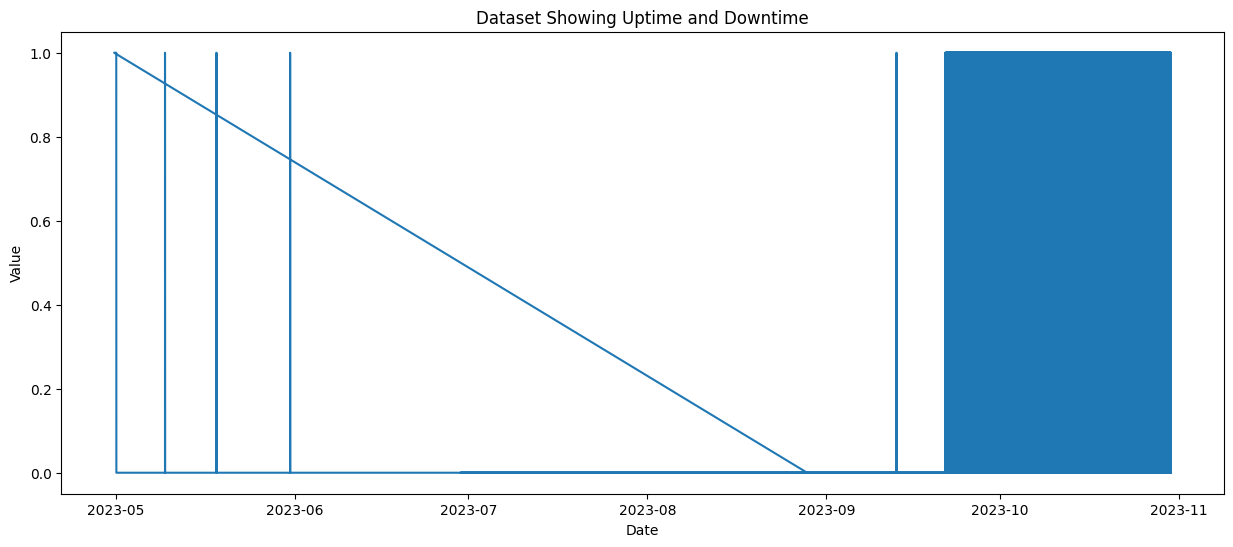

In [55]:
plt.figure(figsize=(15, 6))
plt.plot(data_df_encode['Timestamp'], data_df_encode['Downtime'], label='Value')
plt.title('Dataset Showing Uptime and Downtime')
plt.xlabel('Date')
plt.ylabel('Value')

From the graph above, Days with stokes are days with Downtime

In [56]:
# Plottign a heatmap to see correlation between columns with integer values

correlation_matrix = num_columns_data_df.corr()

# FIrstly, let me print out manuly correlation base on descanding values for my numerical columns
correlation_result_DT = correlation_matrix['Downtime'].sort_values(ascending = False)
correlation_result_DT

Downtime                                                 1.000000
Battery Monitor [260]. Consumed Amphours. (Ah)           0.019738
System overview [0]. Battery Consumed Amphours. (Ah)     0.019738
Battery Monitor [260]. Total Ah drawn. (Ah)              0.015117
Timestamp                                                0.014687
Battery Monitor [260]. Last discharge. (Ah)              0.011207
Battery Monitor [260]. Current. (A)                      0.004322
System overview [0]. Current. (A)                        0.004212
Battery Monitor [260]. Automatic syncs.                  0.003474
System overview [0]. Battery Power. (W)                  0.002708
Battery Monitor [260]. Low voltage alarms.               0.001694
VE.Bus System [261]. Current. (A)                        0.001231
System overview [0]. VE.Bus charge current. (A)          0.001141
System overview [0]. VE.Bus charge power. (W)           -0.004754
Gateway [0]. VRM Log time offset. (s)                   -0.008544
System ove

In [57]:
correlation_result_Grid = correlation_matrix['System overview [0]. Grid L1. (W)'].sort_values(ascending = False)
correlation_result_Grid

System overview [0]. Grid L1. (W)                        1.000000
VE.Bus System [261]. Output current phase 1. (A)         0.404844
System overview [0]. AC Consumption L1. (W)              0.376203
VE.Bus System [261]. Output power 1. (W)                 0.374588
VE.Bus System [261]. Input current phase 1. (A)          0.366053
VE.Bus System [261]. Input power 1. (W)                  0.354026
Battery Monitor [260]. Consumed Amphours. (Ah)           0.343615
System overview [0]. Battery Consumed Amphours. (Ah)     0.343598
VE.Bus System [261]. AC Input 2 Current Limit. (A)       0.285464
VE.Bus System [261]. AC Input 1 Current Limit. (A)       0.285453
VE.Bus System [261]. Input frequency 1. (Hz)             0.284263
Battery Monitor [260]. Total Ah drawn. (Ah)              0.281690
Battery Monitor [260]. State of charge. (%)              0.265306
System overview [0]. Battery SOC. (%)                    0.265258
VE.Bus System [261]. Input voltage phase 1. (V)          0.256820
Tank [20].

In [58]:
correlation_result_Genset = correlation_matrix['System overview [0]. Genset L1. (W)'].sort_values(ascending = False)
correlation_result_Genset

System overview [0]. Genset L1. (W)                      1.000000
Battery Monitor [260]. Charged Energy. (kWh)             0.455279
VE.Bus System [261]. Input power 1. (W)                  0.407799
System overview [0]. VE.Bus charge power. (W)            0.387192
System overview [0]. Battery Power. (W)                  0.367263
VE.Bus System [261]. Input current phase 1. (A)          0.348421
System overview [0]. VE.Bus charge current. (A)          0.345119
System overview [0]. Current. (A)                        0.344800
Battery Monitor [260]. Current. (A)                      0.341909
VE.Bus System [261]. Current. (A)                        0.340410
System overview [0]. AC Consumption L1. (W)              0.214575
VE.Bus System [261]. Output power 1. (W)                 0.214180
VE.Bus System [261]. Output frequency. (Hz)              0.177471
VE.Bus System [261]. Input voltage phase 1. (V)          0.177175
VE.Bus System [261]. Output voltage phase 1. (V)         0.170595
VE.Bus Sys

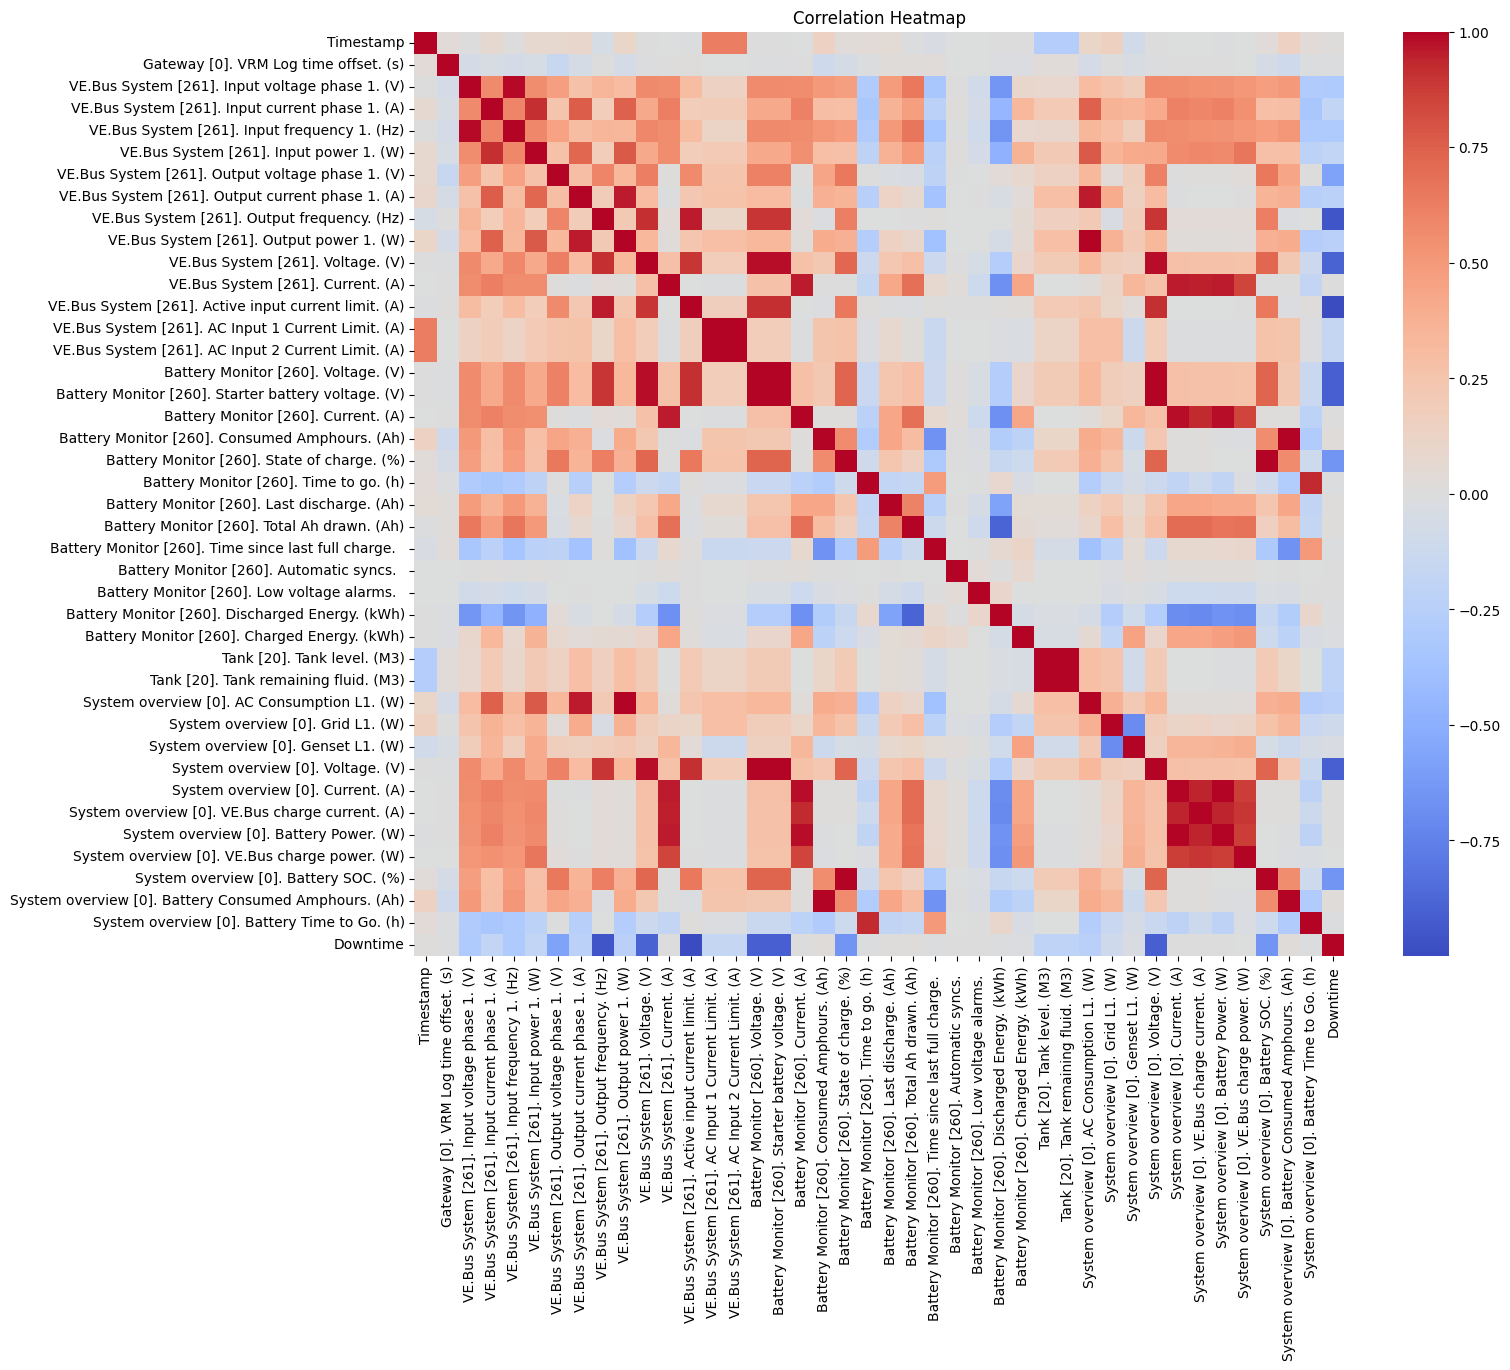

In [59]:
# Create a heatmap
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)  #
plt.title('Correlation Heatmap')
plt.show()

In [60]:
data_quick_view(data_df)

Unique values in column ==============0== "Timestamp" is  ================= 273082
Unique values in column ==============1== "Gateway [0]. VRM Log time offset. (s)" is  ================= 6677
Unique values in column ==============2== "Gateway [0]. ESS Scheduled Charging.  " is  ================= 2
Unique values in column ==============3== "Gateway [0]. Relay 1 state.  " is  ================= 3
Unique values in column ==============4== "Gateway [0]. CCGX Relay 2 state.  " is  ================= 2
Unique values in column ==============5== "VE.Bus System [261]. Phase rotation.  " is  ================= 2
Unique values in column ==============6== "VE.Bus System [261]. Input voltage phase 1. (V)" is  ================= 176
Unique values in column ==============7== "VE.Bus System [261]. Input current phase 1. (A)" is  ================= 64
Unique values in column ==============8== "VE.Bus System [261]. Input frequency 1. (Hz)" is  ================= 52
Unique values in column ==============9== "V

# Feature Engineering

In [61]:
# Now i am picking columns related to another dataframe,
# Using drop method is stressful and not giving me what i wanted after several trials.

selected_column_indices = [0, 9, 24, 37, 49, 63, 65, 70, 77, 78, 79, 80, 82,91, 92]
selected_columns_df = data_df.iloc[:, selected_column_indices]

data_quick_view(selected_columns_df)

selected_columns_df.shape

Unique values in column ==============0== "Timestamp" is  ================= 273082
Unique values in column ==============1== "VE.Bus System [261]. Input power 1. (W)" is  ================= 4601
Unique values in column ==============2== "VE.Bus System [261]. Low battery.  " is  ================= 4
Unique values in column ==============3== "VE.Bus System [261]. Temperature L3.  " is  ================= 2
Unique values in column ==============4== "Battery Monitor [260]. Time to go. (h)" is  ================= 4081
Unique values in column ==============5== "Battery Monitor [260]. Low voltage alarms.  " is  ================= 198
Unique values in column ==============6== "Battery Monitor [260]. Charged Energy. (kWh)" is  ================= 21101
Unique values in column ==============7== "System overview [0]. #2 BatteryLife is active.  " is  ================= 2
Unique values in column ==============8== "System overview [0]. Grid L1. (W)" is  ================= 3528
Unique values in column =======

(273082, 15)

In [62]:
selected_columns_df.head()

,Timestamp,VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Low battery.,VE.Bus System [261]. Temperature L3.,Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Charged Energy. (kWh),System overview [0]. #2 BatteryLife is active.,System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. Battery Power. (W),System overview [261]. Grid alarm.,Downtime
0,2023-08-28 16:05:21,3789.0,Ok,Ok,0.0,0.0,0.0,Off,3789.0,0.0,56.83,0.2,11.366,Grid ok,0
1,2023-08-28 16:06:21,4066.0,Ok,Ok,0.0,0.0,0.0,Off,4066.0,0.0,56.82,0.2,11.364,Grid ok,0
2,2023-08-28 16:07:21,4023.0,Ok,Ok,0.0,0.0,0.0,Off,4023.0,0.0,56.81,0.2,11.362,Grid ok,0
3,2023-08-28 16:08:21,4177.0,Ok,Ok,0.0,0.0,0.0,Off,4177.0,0.0,56.81,0.2,11.362,Grid ok,0
4,2023-08-28 16:09:21,3893.0,Ok,Ok,0.0,0.0,0.0,Off,3893.0,0.0,56.81,0.2,11.362,Grid ok,0


In [63]:
numerical_df = selected_columns_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]'])

#numerical_df = data_df_encode.loc[:, data_df_encode.dtypes != 'object']
list_of_numerical_df = numerical_df.columns.tolist()
print(len(list_of_numerical_df))
list_of_numerical_df

10


['Timestamp',
 'VE.Bus System [261]. Input power 1. (W)',
 'Battery Monitor [260]. Time to go. (h)',
 'Battery Monitor [260]. Low voltage alarms.  ',
 'Battery Monitor [260]. Charged Energy. (kWh)',
 'System overview [0]. Grid L1. (W)',
 'System overview [0]. Genset L1. (W)',
 'System overview [0]. Voltage. (V)',
 'System overview [0]. Current. (A)',
 'System overview [0]. Battery Power. (W)']

In [64]:
multi_unique_df = selected_columns_df.loc[:, selected_columns_df.nunique() != 1]
uni_unique_df = selected_columns_df.loc[:, selected_columns_df.nunique() == 1]
list_of_uni_unique_df = uni_unique_df.columns.tolist()
print(f'{len(list_of_uni_unique_df)} colums have one unique value and its an objest, they are {list_of_uni_unique_df}')
#Now lets extract the categorical features in our num_columns_data_df dataset
categorical_df = multi_unique_df.loc[:, selected_columns_df.dtypes == 'object']
list_of_categorical_df = categorical_df.columns.tolist()
print(len(list_of_categorical_df))
list_of_categorical_df

3 colums have one unique value and its an objest, they are ['VE.Bus System [261]. Temperature L3.  ', 'System overview [0]. #2 BatteryLife is active.  ', 'System overview [261]. Grid alarm.  ']
1


['VE.Bus System [261]. Low battery.  ']

## Encoding of categorical features using One-Hot Encoding because my dataset has Nominal Variable and not Oridinal Variable

In [ ]:
%%time

# Just to see how long it takes here
# To use the One Hot Encoding, we use the pandas get_dummies function
# Though i can use the get_dummies function for ordinal function but it uses a different function
data_df_encode = pd.get_dummies(selected_columns_df, columns=list_of_categorical_df).set_index(categorical_df.index)
data_df_encode


CPU times: user 114 ms, sys: 30.8 ms, total: 145 ms
Wall time: 150 ms


In [ ]:
data_df_encode.shape

In [ ]:
# Print the updated DataFrame
data_df_encode.head()

In [ ]:
# Uncomment if you want the cleanded dataset Downloaded
download = '''file_name = 'DT_0_EAJ0001C_log_20230430-1605_to_20231030-1604_encoded.csv'

# data_df_encode is my cleaned DataFrame
data_df_encode.to_csv(file_name, index=False)

data_df_encode.shape
# Download the CSV file into system locally
try: # If using Ggoogle Colab
    from google.colab import files
    files.download('file_name')
    print('Download')
except Exception as s: # If using Jupyter Lab
    from IPython.display import FileLink
    display(FileLink(file_name))
    print('Downloaded as link above -------->')
except Exception as e:
    print(f'Error: {e}')'''

# Lets build the model now

The Prophet Algorithm built by Meta for now
Prophet is designed for forecasting time series data that exhibits patterns on different time scales. It handles missing data and outliers well.

In [ ]:
# Now i am picking columns related to another dataframe,
prophet_data = data_df_encode[['Timestamp', 'Downtime']]
data_quick_view(prophet_data)

prophet_data.columns = ['ds', 'y'] # Rename the TImestamp to 'ds' and Downtime to 'y' as needed my the algorithm
print(prophet_data.shape)
prophet_data.head()

In [ ]:
# Spliting the dataset into training and testing sets
train_size = int(len(prophet_data) * 0.8) # Pick 80%
train_data, test_data = prophet_data[:train_size], prophet_data[train_size:]
train_data.shape

In [ ]:
test_data.shape

In [ ]:
# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(train_data)

In [ ]:
test_forecast = prophet_model.predict(test_data)

future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecasting for the next year (365 days)
forecast_365 = prophet_model.predict(future_dates)

In [ ]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

In [ ]:
# Plotting the graph
%matplotlib inline
fig = prophet_model.plot(forecast_365)
plt.title('Prophet Time Series Forecast for next 365 days')
plt.show()

In [ ]:
y_test = test_data['y']
mae = mean_absolute_error(y_test, test_forecast['yhat'])
print(f'MAE = {mae}')

mse = mean_squared_error(y_test, test_forecast['yhat'])
print(f'MSE = {mse}')

# Lets build a model with the AutoRegressive Integrated Moving Average (ARIMA)
Before building the model, some EDA might still be needed but because the variable we want to predict has just 2 possible case, (i.e Uptime and Downtime). If not that, some EDA that will be needed may include
- Stationarity Check using Augumented Dickey-FUller Test
- Plotting the AutoCorrelation Function (ACF) to identify the order of the ARIMA Model
- Plotting the Partial AutoCorrelation Function (PACF) to identify the order of the ARIMA Model
- Outlier Detection Techniques to handle outliers in the model
- Smoothing ETC

In [ ]:
X = data_df_encode.drop('Downtime', axis=1)  # Features
y = data_df_encode[['Downtime']]  # Target

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Downtime')
plt.title('Time Series Data - Downtime')
plt.xlabel('Timestamp')
plt.ylabel('Downtime')
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF

plot_acf(y, lags=50) #autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
# Plot PACF
plot_pacf(y, lags=50) # partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

In [ ]:
# Train the ARIMA model
order = (2, 1, 2)   #The (p, d, q) order in an ARIMA model representing three components
model = ARIMA(train, order=order)

In [ ]:
fit_model = model.fit()

In [ ]:
# Forecast on the test set
forecast = fit_model.get_forecast(steps=len(test))

In [ ]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Diesel Consumed')
plt.plot(forecast.predicted_mean, label='Predicted Diesel Consumed')
plt.title('ARIMA Model - Actual vs. Predicted Diesel Consumed')
plt.xlabel('Timestamp')
plt.ylabel('Diesel Consumed')
plt.legend()
plt.show()

# Lets build another model with XGBoost Algorithm.
## The Extreme Gradient Boost (XGBoost) will help use better take care of Overfitting and Underfitting

In [ ]:
%%time
# Lets encode the timestamp
from sklearn.preprocessing import LabelEncoder

# Assuming 'timestamp_column' is your timestamp column
timestamp_columns = ['year', 'month', 'day', 'hour', 'minute']

label_encoders = {}

for col in timestamp_columns:
    label_encoders[col] = LabelEncoder()
    data_df_encode[col + '_encoded'] = label_encoders[col].fit_transform(data_df_encode['Timestamp'].dt.__getattribute__(col))

# Drop the original timestamp column
XGB_data_df = data_df_encode.drop('Timestamp', axis=1)
XGB_data_df

In [ ]:
#Define features (X) and target (y)
X = XGB_data_df.drop('Downtime', axis=1)  # Features
y = XGB_data_df[['Downtime']]  # Target

print(X.head())

print(y.head())

print(y.isnull().sum())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the XGBoost model
model = XGBClassifier()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {mse:.2f}')

In [ ]:
rsme = sqrt(mse)
print(f'RMSE = {rsme:.2f}')

# Testing Our Model With The New Data

In [ ]:
data_head_test_df  = data_head_df4 
test_df = data_df4

In [ ]:
print(f'For data with adjusted heading, shape is {test_df.shape}, total no of null is {test_df.isnull().sum().sum()}')

In [ ]:
test_head_df = pd.read_csv(download_link_test, header = None, skiprows=lambda x: x not in rows_to_load)

In [ ]:
test_head_df

In [ ]:
header_writer(test_df, test_head_df)
test_df.columns = test_df.columns.set_names(None)
test_df.head()

In [ ]:
test_df.dtypes

In [ ]:
test_df.dtypes

In [ ]:
drop_common_columns(test_df,common_columns_list)

test_df.shape

In [ ]:
pd.set_option('display.max_columns', None)

test_df.head()

In [ ]:
pd.set_option('display.max_columns', None)

print(test_df.info())

In [ ]:
null_counter(test_df)

In [ ]:
test_df.nunique()

In [ ]:
test_df.select_dtypes(include = 'object').nunique()

In [ ]:
data_quick_view(test_df)

In [ ]:
#lets rename our column 'timestamp.  Africa/Lagos (+01:00).'
# data_df = data_df.rename(columns = {"timestamp.  Africa/Lagos (+01:00).": "Timestamp"})  # Not Working, lets try other options

column_names = test_df.columns.tolist()
timestamp_new_name = 'Timestamp'
column_names[0] = timestamp_new_name
test_df.columns = column_names

test_df.head(2)

In [ ]:
#converting our timestamp.  Africa/Lagos (+01:00) column to the right datetime dtype
# Will be helpful for time series modelling
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])#, format='mixed') # The format mixed tells that my datasets doesn't have one specific format for all timestamp row in the dataset

test_df.head(2)

In [ ]:
# I am creating a new column 'Downtime' in my DataFrame 'data_df'.
# This column is based on the condition that if either 'System overview [0].  Grid L1.  (W)'
# or 'System overview [0].  Genset L1.  (W)' has a value (not NaN), 'Downtime' is set to 0, Meaning there is not downtime.
# Otherwise, if both columns are NaN, 'Downtime' is set to 1, meaning there is a downtime.

# This helps represent downtime scenarios where either the grid or genset has a power value.

test_df['Downtime'] = np.where( #The where function snp.where(...) is a NumPy function that acts as a vectorized if-else statement. It takes three arguments
    (test_df['System overview [0]. Grid L1. (W)'].notna()) | # The symbol | here meaning OR operator just like & means AND operator
    (test_df['System overview [0]. Genset L1. (W)'].notna())|
    (test_df['System overview [0]. Battery Power. (W)'].notna()), #The first argument is a condition.
    0,# The second argument is the value to be assigned where the condition is True. # Will set 'Downtime' to 0 if either of the columns has a value
    1 # The third argument is the value to be assigned where the condition is False.  # Will Set 'Downtime' to 1 if both columns are NaN
    )
#data_df['Downtime'] = np.where((data_df['System overview [0].  Grid L1.  (W)'].notna()) | (data_df['System overview [0].  Genset L1.  (W)'].notna()), 0, 1)


test_df.head()

In [ ]:
test_df['Downtime'].value_counts()

In [ ]:
#slicing data with numerical columns (i.e int32 and float64) from the dataset
num_columns_test_df = test_df.loc[:, test_df.dtypes != 'object']

num_columns_test_df.shape

In [ ]:
num_columns_test_df.head(3)

In [ ]:
num_columns_test_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets

In [ ]:
test_df.isnull().sum().sum() #This tells the total number of NaN in every columns of the datasets

In [ ]:
num_columns_test_df = num_columns_test_df.fillna(0) # FIlling NaN in the setions dataset


# Select only numeric columns whose values is float or integer
#numeric_columns = data_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]']).columns

numeric_columns = num_columns_test_df.columns
print(test_df[numeric_columns].isnull().sum().sum())
# Fill NaN values with 0 for numeric columns
test_df[numeric_columns] = test_df[numeric_columns].fillna(0) #  FIlling NaN with Zero in the main dataset

print(test_df[numeric_columns].isnull().sum().sum())
test_df[numeric_columns].head()

In [ ]:
#slicing data with non-numerical columns (i.e column suitable for categorical) from the dataset
non_num_columns_test_df = test_df.loc[:, test_df.dtypes == 'object']

non_num_columns_test_df.shape

In [ ]:
test_df.shape

In [ ]:
#now, lets combine the non_num_columns_data_df and the cleaned num_columns_data_df

test_df_encode = pd.concat([num_columns_test_df, non_num_columns_test_df], axis=1)

file_name = 'DT_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv'

#data_df_encode is my cleaned DataFrame
test_df_encode.to_csv(file_name, index=False)

test_df_encode.shape

In [ ]:
from IPython.display import display

pd.set_option('display.max_columns', None)

display(test_df_encode.head())

In [ ]:
data_quick_view(test_df)

In [ ]:
# Now i am picking columns related to another dataframe,
# Using drop method is stressful and not giving me what i wanted after several trials.

selected_column_indices = [0, 9, 24, 37, 49, 63, 65, 70, 77, 78, 79, 80, 82,91, 92]
selected_columns_df = test_df.iloc[:, selected_column_indices]

data_quick_view(selected_columns_df)

selected_columns_df.shape

In [ ]:
selected_columns_df.head()

In [ ]:
numerical_df = selected_columns_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]'])

#numerical_df = data_df_encode.loc[:, data_df_encode.dtypes != 'object']
list_of_numerical_df = numerical_df.columns.tolist()
print(len(list_of_numerical_df))
list_of_numerical_df.head()

In [ ]:
multi_unique_df = selected_columns_df.loc[:, selected_columns_df.nunique() != 1]
uni_unique_df = selected_columns_df.loc[:, selected_columns_df.nunique() == 1]
list_of_uni_unique_df = uni_unique_df.columns.tolist()
print(f'{len(list_of_uni_unique_df)} colums have one unique value and its an objest, they are {list_of_uni_unique_df}')
#Now lets extract the categorical features in our num_columns_data_df dataset
categorical_df = multi_unique_df.loc[:, selected_columns_df.dtypes == 'object']
list_of_categorical_df = categorical_df.columns.tolist()
print(len(list_of_categorical_df))
list_of_categorical_df

In [ ]:
%%time

# Just to see how long it takes here
# To use the One Hot Encoding, we use the padanse get_dummies function
test_df_encode = pd.get_dummies(selected_columns_df, columns=list_of_categorical_df).set_index(categorical_df.index)
test_df_encode

In [ ]:
test_df_encode.shape

In [ ]:
test_df_encode.head()

# Using the Prophet Model

In [ ]:
# Now i am picking columns related to another dataframe,
prophet_test_data = test_df_encode[['Timestamp', 'Downtime']]
data_quick_view(prophet_test_data)

prophet_test_data.columns = ['ds', 'y'] # Rename the TImestamp to 'ds' and Downtime to 'y' as needed my the algorithm
print(prophet_test_data.shape)
prophet_test_data.head()

In [ ]:
test_forecast = prophet_model.predict(prophet_test_data)

future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecasting for the next year (365 days)
forecast_365 = prophet_model.predict(future_dates)

In [ ]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

In [ ]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

Checking the accuracy of the prophet model

In [ ]:
y_test = prophet_test_data['y']
mae = mean_absolute_error(y_test, test_forecast['yhat'])
print(f'MAE = {mae}')

mse = mean_squared_error(y_test, test_forecast['yhat'])
print(f'MSE = {mse}')

# Using the XGBOOST Model

In [ ]:
# Lets encode the timestamp
from sklearn.preprocessing import LabelEncoder

# Assuming 'timestamp_column' is your timestamp column
timestamp_columns = ['year', 'month', 'day', 'hour', 'minute']

label_encoders = {}

for col in timestamp_columns:
    label_encoders[col] = LabelEncoder()
    test_df_encode[col + '_encoded'] = label_encoders[col].fit_transform(test_df_encode['Timestamp'].dt.__getattribute__(col))

# Drop the original timestamp column
XGB_test_df = test_df_encode.drop('Timestamp', axis=1)
XGB_test_df

In [ ]:
#Define features (X) and target (y)
X_test = XGB_test_df.drop('Downtime', axis=1)  # Features
y_test = XGB_test_df[['Downtime']]  # Target

print(X_test.head())

print(y_test.head())

print(y_test.isnull().sum())

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

Evaluating the XGBOOST Model

In [ ]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {mse:.2f}')

In [ ]:
rsme = sqrt(mse)
print(f'RMSE = {rsme:.2f}')

# THANKS